**What does Multi-Modal mean?**

The term Multi-Modal is used to refer to multiple kinds of data. For example, consider a YouTube video. It can be thought to contain 3 different modalities -

* The video frames (visual modality)
* The audio clip of what's being spoken (audio modality)
* Some videos also come with the transcription of the words spoken in the form of subtitles (textual modality)

Consider, that I'm interested in classifying a song on YouTube as pop or rock. You can use any of the above 3 modalities to predict the genre - The video, the song itself, or the lyrics. But, needless to say, you can predict it much better if you could use all three simultaneously. This is what we mean by multi-modal classification.

Here I will make use of visual and textual data for classification of movie genres.

In [1]:
!pip install IMDbPY
!pip install tmdb3
!pip install tmdbsimple
!pip install python3-wget

In [2]:
from urllib.request import urlopen
import requests
import json
import imdb
import time
import itertools
import wget
import os
import tmdbsimple as tmdb
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [3]:
poster_folder='posters_final/'
if poster_folder.split('/')[0] in os.listdir('./'):
    print('Folder already exists')
else:
    os.mkdir('./'+poster_folder)

Folder already exists


In [4]:
poster_folder

'posters_final/'

In [5]:
import tmdbsimple as tmdb
tmdb.API_KEY = '3a8a0e5191ed4a3473382568ed95d4bb'
search = tmdb.Search()

#https://api.themoviedb.org/3/search/movie?api_key=3a8a0e5191ed4a3473382568ed95d4bb&query=whiplash&language=de-DE&region=DE

# These functions take in a string movie name i.e. like "The Matrix" or "Interstellar"
# What they return is pretty much clear in the name - Poster, ID , Info or genre of the Movie!
def grab_poster_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    posterp=movie.info()['poster_path']
    title=movie.info()['original_title']
    url='image.tmdb.org/t/p/original'+posterp
    title='_'.join(title.split(' '))
    strcmd='wget -O '+poster_folder+title+'.jpg '+url
    os.system(strcmd)

def get_movie_id_tmdb(movie):
    response = search.movie(query=movie)
    movie_id=response['results'][0]['id']
    return movie_id

def get_movie_info_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    info=movie.info()
    return info

def get_movie_genres_tmdb(movie):
    response = search.movie(query=movie)
    id=response['results'][0]['id']
    movie = tmdb.Movies(id)
    genres=movie.info()['genres']
    return genres

In [6]:
print(get_movie_genres_tmdb("The Matrix"))

[{'id': 28, 'name': 'Action'}, {'id': 878, 'name': 'Science Fiction'}]


In [7]:
info=get_movie_info_tmdb("The Matrix")
print(info['tagline'])

Welcome to the Real World.


In [8]:
# Create the IMDB object that will be used to access the IMDb's database.
imbd_object = imdb.IMDb() # by default access the web.

# Search for a movie (get a list of Movie objects).
results = imbd_object.search_movie('The Matrix')

# As this returns a list of all movies containing the word "The Matrix", we pick the first element
movie = results[0]

imbd_object.update(movie)

print("All the information we can get about this movie from IMDB-")
movie.keys()

All the information we can get about this movie from IMDB-


['title',
 'kind',
 'year',
 'cover url',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'box office',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'plot outline',
 'languages',
 'directors',
 'writers',
 'producers',
 'composers',
 'cinematographers',
 'editors',
 'editorial department',
 'casting directors',
 'production designers',
 'art directors',
 'set decorators',
 'costume designers',
 'make up department',
 'production managers',
 'assistant directors',
 'art department',
 'sound department',
 'special effects',
 'visual effects',
 'stunts',
 'camera department',
 'animation department',
 'casting department',
 'costume departmen',
 'location management',
 'music department',
 'script department',
 'transportation department',
 'miscellaneous',
 'akas',
 'writer',
 'director',
 'top 250 rank',
 'production companies',
 'distributors',
 'special effects companies',
 'other compan

In [9]:
print("The genres associated with the movie are - ",movie['genres'])


The genres associated with the movie are -  ['Action', 'Sci-Fi']


In [10]:
print("The genres for The Matrix pulled from IMDB are -{0}".format(movie['genres']))
print("The genres for The Matrix pulled from TMDB are -",get_movie_genres_tmdb("The Matrix"))

The genres for The Matrix pulled from IMDB are -['Action', 'Sci-Fi']
The genres for The Matrix pulled from TMDB are - [{'id': 28, 'name': 'Action'}, {'id': 878, 'name': 'Science Fiction'}]


In [11]:
all_movies=tmdb.Movies()
top_movies=all_movies.popular()

# This is a dictionary, and to access results we use the key 'results' which returns info on 20 movies
print(len(top_movies['results']))
top20_movs=top_movies['results']

20


In [12]:
first_movie=top20_movs[0]
print("Here is all the information you can get on this movie - ")
print(first_movie)
print("\n\nThe title of the first movie is - ", first_movie['title'])

Here is all the information you can get on this movie - 
{'popularity': 1102.45, 'vote_count': 134, 'video': False, 'poster_path': '/uOw5JD8IlD546feZ6oxbIjvN66P.jpg', 'id': 718444, 'adult': False, 'backdrop_path': '/x4UkhIQuHIJyeeOTdcbZ3t3gBSa.jpg', 'original_language': 'en', 'original_title': 'Rogue', 'genre_ids': [28], 'title': 'Rogue', 'vote_average': 6.1, 'overview': 'Battle-hardened O’Hara leads a lively mercenary team of soldiers on a daring mission: rescue hostages from their captors in remote Africa. But as the mission goes awry and the team is stranded, O’Hara’s squad must face a bloody, brutal encounter with a gang of rebels.', 'release_date': '2020-08-20'}


The title of the first movie is -  Rogue


In [13]:
for i in range(len(top20_movs)):
    mov=top20_movs[i]
    title=mov['title']
    print(title)
    if i==4:
        break

Rogue
Project Power
One Night in Bangkok
Superman: Man of Tomorrow
Peninsula


In [14]:
for i in range(len(top20_movs)):
    mov = top20_movs[i]
    genres = mov['genre_ids']
    print(genres)
    if i == 4:
        break
    

[28]
[28, 80, 878]
[28, 53]
[28, 16, 878]
[28, 27, 53]


In [15]:
genres = tmdb.Genres()
list_of_genres = genres.movie_list()['genres']

In [16]:
Genre_ID_to_name={}
for i in range(len(list_of_genres)):
    genre_id=list_of_genres[i]['id']
    genre_name=list_of_genres[i]['name']
    Genre_ID_to_name[genre_id]=genre_name

In [17]:
for i in range(len(top20_movs)):
    mov = top20_movs[i]
    title = mov['title']
    genre_ids = mov['genre_ids']
    genre_names = []
    for id in genre_ids:
        genre_name = Genre_ID_to_name[id]
        genre_names.append(genre_name)
    print(title,genre_names)
    if i ==4:
        break

Rogue ['Action']
Project Power ['Action', 'Crime', 'Science Fiction']
One Night in Bangkok ['Action', 'Thriller']
Superman: Man of Tomorrow ['Action', 'Animation', 'Science Fiction']
Peninsula ['Action', 'Horror', 'Thriller']


In [18]:
'''all_movies=tmdb.Movies()
top1000_movies=[]
print('Pulling movie list, Please wait...')
for i in range(1,51):
    if i%15==0:
        time.sleep(7)
    movies_on_this_page=all_movies.popular(page=i)['results']
    top1000_movies.extend(movies_on_this_page)
len(top1000_movies)
f3=open('movie_list.pckl','wb')
pickle.dump(top1000_movies,f3)
f3.close()
print('Done!')'''

"all_movies=tmdb.Movies()\ntop1000_movies=[]\nprint('Pulling movie list, Please wait...')\nfor i in range(1,51):\n    if i%15==0:\n        time.sleep(7)\n    movies_on_this_page=all_movies.popular(page=i)['results']\n    top1000_movies.extend(movies_on_this_page)\nlen(top1000_movies)\nf3=open('movie_list.pckl','wb')\npickle.dump(top1000_movies,f3)\nf3.close()\nprint('Done!')"

In [19]:
f3=open('movie_list.pckl','rb')
top1000_movies=pickle.load(f3)
f3.close()

**Pairwise analysis of Movie Genres**


As our dataset is multi label, simply looking at the ditribution of genres is not sufficient. It might be beneficial to see which genres co-occur, as it might shed some light on inherent biases in our dataset. For example, it would make sense if romance and comedy occur together more often than documentary and comedy. Such inherent biases tell us that the underlying population we are sampling from itself is skewed and not balanced. We may then take steps to account for such problems. Even if we don't take such steps, it is important to be aware that we are making the assumption that an unbalanced dataset is not hurting our performance and if need be, we can come back to address this assumption. Good old scientific method, eh?

So for the top 1000 movies let's do some pairwise analysis for genre distributions. Our main purpose is to see which genres occur together in the same movie. So, we first define a function which takes a list and makes all possible pairs from it. Then, we pull the list of genres for a movie and run this function on the list of genres to get all pairs of genres which occur together

In [20]:
def list2pairs(l):
    # itertools.combinations(l,2) makes all pairs of length 2 from list l.
    pairs = list(itertools.combinations(l, 2))
    # then the one item pairs, as duplicate pairs aren't accounted for by itertools
    for i in l:
        pairs.append([i,i])
    return pairs

In [21]:
allPairs = []
for movie in top1000_movies:
    allPairs.extend(list2pairs(movie['genre_ids']))
    
nr_ids = np.unique(allPairs)
visGrid = np.zeros((len(nr_ids), len(nr_ids)))
for p in allPairs:
    visGrid[np.argwhere(nr_ids==p[0]), np.argwhere(nr_ids==p[1])]+=1
    if p[1] != p[0]:
        visGrid[np.argwhere(nr_ids==p[1]), np.argwhere(nr_ids==p[0])]+=1

Let's take a look at the structure we just made. It is a 19X19 structure, as shown below. Also, see that we had 19 Genres. Needless to say, this structure counts the number of simultaneous occurrences of genres in same movie.


In [22]:
print(visGrid.shape)
print(len(Genre_ID_to_name.keys()))

(19, 19)
19


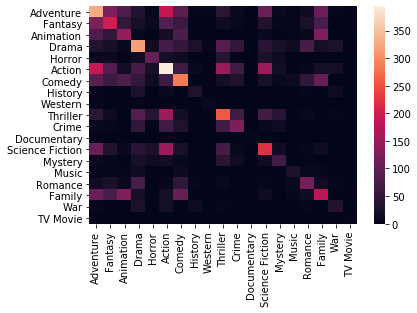

In [23]:
annot_lookup = []
for i in range(len(nr_ids)):
    annot_lookup.append(Genre_ID_to_name[nr_ids[i]])

sns.heatmap(visGrid, xticklabels=annot_lookup, yticklabels=annot_lookup)

Important thing to notice in the above plot is the diagonal. The diagonal corresponds to self-pairs, i.e. number of times a genre, say Drama occurred with Drama. Which is basically just a count of the total times that genre occurred!

As we can see there are a lot of dramas in the data set, it is also a very unspecific label. There are nearly no documentaries or TV Movies. Horror is a very distinct label, and romance is also not too widely spread.

In [24]:
from sklearn.cluster import SpectralCoclustering

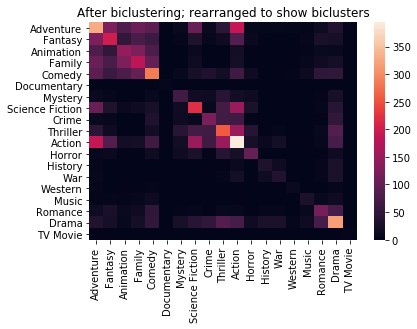

In [25]:
model = SpectralCoclustering(n_clusters=5)
model.fit(visGrid)

fit_data = visGrid[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

annot_lookup_sorted = []
for i in np.argsort(model.row_labels_):
    annot_lookup_sorted.append(Genre_ID_to_name[nr_ids[i]])
    
sns.heatmap(fit_data, xticklabels=annot_lookup_sorted, yticklabels=annot_lookup_sorted, annot=False)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()